# Active Dashboards

## At the end of this analyisis you'll be able to:
    [X] Identify which pages ran reports in Dashboard Components
    [X] How many of those pages had errors
    [X] The percentage of each kind of errors 
    
### In this analysis were used the following objects:
* #### [Report Event Type](https://developer.salesforce.com/docs/atlas.en-us.238.0.object_reference.meta/object_reference/sforce_api_objects_eventlogfile_report.htm])
* #### [Lightning Page View Event Type](https://developer.salesforce.com/docs/atlas.en-us.238.0.object_reference.meta/object_reference/sforce_api_objects_eventlogfile_lightningpageview.htm?q=lightning+page+view)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [110]:
LightningPageView = pd.read_csv('./datasets/2022-06-20_LightningPageView.csv')

In [111]:
#Reading Report Event Type Samples
ReportEvent0620 = pd.read_csv('./datasets/2022-06-20_Report.csv')
ReportEvent0604 = pd.read_csv('./datasets/2022-06-04_Report.csv')
ReportEvent0605 = pd.read_csv('./datasets/2022-06-05_Report.csv')

C:\Users\izaquiel_cordeiro\AppData\Local\Temp\ipykernel_3940\3773777100.py:3: DtypeWarning: Columns (1,5,6,12,17,18,19,20,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  ReportEvent0604 = pd.read_csv('./datasets/2022-06-04_Report.csv')


In [56]:
# Concatening all the samples into one data frame
ReportEvent = pd.concat([ReportEvent0604, ReportEvent0605, ReportEvent0620])

In [57]:
ReportEvent.duplicated().value_counts()

False    144824
True          7
dtype: int64

In [58]:
#Droping the duplcates
ReportEvent.drop_duplicates(inplace=True)

In [59]:
ReportEvent = ReportEvent.reset_index().drop('index',axis=1)

In [60]:
#filtering the reports that ran in dashboard
ReportEvent_DASHBOARD = ReportEvent[(ReportEvent.ORIGIN == 'DashboardComponentPreviewed') | (ReportEvent.ORIGIN == 'DashboardComponentUpdated')]

In [63]:
#Function to extract REPORT_ID_DERIVED from PAGE_URL
def get_report_info_from_endpoint(page_url):
    prefix = "/lightning/r/"
    if page_url.startswith(prefix):
        uri = page_url.split(prefix)[1]
        if uri:
            report_type, report_id_derived = uri.split("/")[:2]
            return report_id_derived

In [64]:
#Filter non null values in PAGE_URL
LightningPageView.dropna(subset=['PAGE_URL'], inplace=True)

In [65]:
# Extracting the REPORT_ID_DERIVED
LightningPageView['REPORT_ID_DERIVED'] = LightningPageView.PAGE_URL.apply(get_report_info_from_endpoint)

In [66]:
# Considering only the reports that were associated with an ID
LightningPageView_REPORTS = LightningPageView.dropna(subset=['REPORT_ID_DERIVED'])

In [67]:
#Considering ony non null report_ids
ReportEvent = ReportEvent.dropna(subset=['REPORT_ID_DERIVED'])

In [68]:
#ReportEvent_DASHBOARD = ReportEvent[ReportEvent.REPORT_ID_DERIVED.isin(LightningPageView_REPORTS.REPORT_ID_DERIVED)].reset_index().drop('index', axis=1)

In [69]:
#Filtering the page view log that occurs onlu with the ID caught on whose that run in a dashboard
LightningPageView_DASHBOARD = LightningPageView[LightningPageView.REPORT_ID_DERIVED.isin(ReportEvent_DASHBOARD.REPORT_ID_DERIVED)].reset_index().drop('index', axis=1)

In [70]:
#catching the page view info of those pages that had an error
LightningPageView_DASHBOARD_PROBLEMATICS = LightningPageView_DASHBOARD[LightningPageView_DASHBOARD['EFFECTIVE_PAGE_TIME_DEVIATION']==True]
LightningPageView_DASHBOARD_PROBLEMATICS

,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,CLIENT_ID,SESSION_KEY,LOGIN_KEY,USER_TYPE,APP_NAME,...,PREVPAGE_CONTEXT,PREVPAGE_URL,PREVPAGE_APP_NAME,TARGET_UI_ELEMENT,PARENT_UI_ELEMENT,GRANDPARENT_UI_ELEMENT,TIMESTAMP_DERIVED,USER_ID_DERIVED,CLIENT_IP,REPORT_ID_DERIVED
1,LightningPageView,2.022062e+13,TID:329717019000003f44,00D0b000000GaMp,0052R00000ASQHi,NaN,n4f/nVnM3nCXAtrQ,coEvcZ+72aOow8Fe,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005s2hRQAQ/view?ws=%...,LightningService,NaN,NaN,NaN,2022-06-20T00:05:46.088Z,0052R00000ASQHiQAP,143.166.183.0,00O0b000004kTazEAE
2,LightningPageView,2.022062e+13,TID:7918482400000b58c2,00D0b000000GaMp,0050b000004K6UA,NaN,SAS+/J8jmlGjuc0A,R0xpWunnC7t4rKJt,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000004zE2pQAE/view,LightningService,NaN,NaN,NaN,2022-06-20T00:07:22.464Z,0050b000004K6UAAA0,203.174.168.50,00O0b000004kTazEAE
3,LightningPageView,2.022062e+13,TID:3129104390000cbf33,00D0b000000GaMp,0056P000000Dfs3,NaN,Kqk9OsOMCbfHPdjT,2FX1ZmrBfbnAh17B,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005c9vCQAQ/view?ws=%...,LightningService,NaN,NaN,NaN,2022-06-20T00:08:21.493Z,0056P000000Dfs3QAC,132.237.180.18,00O0b000004kTazEAE
6,LightningPageView,2.022062e+13,TID:23610541000006d27f,00D0b000000GaMp,0050b000004K6f2,NaN,Wo0oJowSpRFunsZc,4DmR/XKLoL9SZraA,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Asset/02i2R00000CuiIYQAZ/view,LightningService,NaN,NaN,NaN,2022-06-20T00:11:49.780Z,0050b000004K6f2AAC,132.237.180.17,00O0b000004kTazEAE
7,LightningPageView,2.022062e+13,TID:14573880000009bf3f,00D0b000000GaMp,0056P000000Dfrz,NaN,QcChwKlyT3BschZZ,Zp3ErV08tdpcw0aH,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005rvFuQAI/view,LightningService,NaN,NaN,NaN,2022-06-20T00:11:51.233Z,0056P000000DfrzQAC,132.237.180.16,00O0b000004kTazEAE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,LightningPageView,2.022062e+13,TID:5795511000000a988e,00D0b000000GaMp,0050b000005Ce4z,NaN,9XaZdmROcO9xSiRw,3aikcsPXvLVMPtob,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005vkAhQAI/view?ws=%...,LightningService,NaN,NaN,NaN,2022-06-20T00:57:57.122Z,0050b000005Ce4zAAC,132.237.180.17,00O0b000004kTazEAE
130,LightningPageView,2.022062e+13,TID:609448000000dfa7b7,00D0b000000GaMp,0056P0000011hQX,NaN,eWsJ169Sd2QFUe0k,7RFZVn0XTFy1jG6v,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005a2x5QAA/view?ws=%...,LightningService,NaN,NaN,NaN,2022-06-20T00:58:03.119Z,0056P0000011hQXQAY,143.166.253.244,00O0b000004kTazEAE
131,LightningPageView,2.022062e+13,TID:233415000009750c70,00D0b000000GaMp,0056P000000xVYN,NaN,W17rbNkv07to8vNA,fjuWBo2bNTxMK5Rb,Standard,one:one,...,undefined,NaN,NaN,NaN,NaN,NaN,2022-06-20T00:58:40.718Z,0056P000000xVYNQA2,143.166.226.111,00O0b000004kTazEAE
132,LightningPageView,2.022062e+13,TID:9207179200000dbe8b,00D0b000000GaMp,0050b000005CdDg,NaN,Zt7yauONEjwb5PuO,BiUbVoEeEgOUYKyU,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005wADwQAM/view,LightningService,NaN,NaN,NaN,2022-06-20T00:58:41.790Z,0050b000005CdDgAAK,143.166.255.127,00O0b000004kTazEAE


In [71]:
#filtering page view info that reports were not run in dashboard
LightningPageView_NOT_DASHBOARD = LightningPageView[~LightningPageView.REPORT_ID_DERIVED.isin(LightningPageView_DASHBOARD.REPORT_ID_DERIVED)]
LightningPageView_NOT_DASHBOARD

,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,CLIENT_ID,SESSION_KEY,LOGIN_KEY,USER_TYPE,APP_NAME,...,PREVPAGE_CONTEXT,PREVPAGE_URL,PREVPAGE_APP_NAME,TARGET_UI_ELEMENT,PARENT_UI_ELEMENT,GRANDPARENT_UI_ELEMENT,TIMESTAMP_DERIVED,USER_ID_DERIVED,CLIENT_IP,REPORT_ID_DERIVED
0,LightningPageView,2.022062e+13,TID:354812000006d78c47,00D0b000000GaMp,0056P000000xXGc,NaN,DkrMLnselIW4a5EP,sJxFELZ4Maod2+Dp,Standard,one:one,...,home:landing,/lightning/page/home,PSA_Dell,NaN,NaN,NaN,2022-06-20T00:00:03.155Z,0056P000000xXGcQAM,1.158.84.17,a2U6P000000GybgUAC
1,LightningPageView,2.022062e+13,TID:58030194000009ce81,00D0b000000GaMp,0050b000004KP2Y,NaN,FNYwFEC/js/SJBfr,CouvuCikaCZftK4Z,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005wV26QAE/view,LightningService,NaN,NaN,NaN,2022-06-20T00:00:05.696Z,0050b000004KP2YAAW,143.166.255.112,None
2,LightningPageView,2.022062e+13,TID:12985703000004ffe6,00D0b000000GaMp,0050b000004K6qi,NaN,kli/tj2J178nuyC/,JO3VQlVLEQ2oZRfV,Standard,one:one,...,one:recordHomeFlexipage,/lightning/r/WorkOrder/0WO6P0000022kdHWAQ/view...,LightningService,NaN,NaN,NaN,2022-06-20T00:00:17.340Z,0050b000004K6qiAAC,132.237.180.18,5006P000005SbYIQA0
3,LightningPageView,2.022062e+13,TID:1110858890000f262c,00D0b000000GaMp,0051P000003jYNO,NaN,13BZwFCUcj0WV/FF,0P9VYIdBZl/K+YT/,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000006C7deQAC/view,LightningService,NaN,NaN,NaN,2022-06-20T00:00:17.592Z,0051P000003jYNOQA2,143.166.255.112,5006P000005AiInQAK
4,LightningPageView,2.022062e+13,TID:5970860900002827b3,00D0b000000GaMp,0052R000009nJBD,NaN,SFUtGUXsW73SFMp1,B4NT9B16irAxXnhd,Standard,one:one,...,home:landing,/lightning/page/home,LightningService,NaN,NaN,NaN,2022-06-20T00:00:17.718Z,0052R000009nJBDQA2,143.166.226.115,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9666,LightningPageView,2.022062e+13,TID:2131481039000040ac,00D0b000000GaMp,0051P000003gGaJ,NaN,7l79yoIIpgXhppu9,kIgQvtMoxIDB9Y03,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005vy8pQAA/view,LightningService,NaN,NaN,NaN,2022-06-20T00:59:58.975Z,0051P000003gGaJQAU,128.221.224.202,None
9667,LightningPageView,2.022062e+13,TID:2096834100000cdeb7,00D0b000000GaMp,0050b000004K6s0,NaN,FFqIXSkd1lg3R12W,iWv0ffO9RNaYin4h,Standard,one:one,...,omni:supervisorPanel,/one/one.app#eyJjb21wb25lbnREZWYiOiJvbW5pOnN1c...,LightningService,NaN,NaN,NaN,2022-06-20T00:59:59.471Z,0050b000004K6s0AAC,163.244.182.11,00O0b000006iNwdEAE
9668,LightningPageView,2.022062e+13,TID:34673908000006d98a,00D0b000000GaMp,0050b000004KCW0,NaN,zSlTWpkr6eIMM1jJ,rK7/xkSr+ei6SZT8,Standard,one:one,...,force:objectHomeDesktop,/lightning/o/Case/list?filterName=00B2R000005i...,LightningService,NaN,NaN,NaN,2022-06-20T00:59:59.475Z,0050b000004KCW0AAO,123.177.53.1,5006P000005WkI7QAK
9669,LightningPageView,2.022062e+13,TID:1570044100000d4e5c,00D0b000000GaMp,0050b000004KDXg,NaN,fpCpwvb6vZPBenEc,GI62syGdux16/Ukg,Standard,one:one,...,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005cMpfQAE/view,LightningService,NaN,NaN,NaN,2022-06-20T00:59:59.627Z,0050b000004KDXgAAO,163.244.246.214,0036P000004JSl5QAG


## Reports that were run in Dashboard Components

In [77]:
round(len(LightningPageView_DASHBOARD) / len(LightningPageView), 3)

0.014

#### About less than 1.5% of the page view sample has reports ran in dashboard

In [78]:
LightningPageView_DASHBOARD.DURATION.mean()

2627.7226277372265

#### The average duration of a page whose reports were run in a dashboard is about 2.6 seconds. Almost 1 second less than those that had not run in dashboards

[]

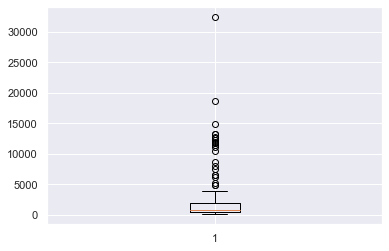

In [87]:
plt.boxplot(LightningPageView_DASHBOARD.DURATION)
plt.plot()

In [79]:
LightningPageView_DASHBOARD.EFFECTIVE_PAGE_TIME_DEVIATION.value_counts(True)

True     0.547445
False    0.452555
Name: EFFECTIVE_PAGE_TIME_DEVIATION, dtype: float64

#### ~54% of the pages that were run reports in Dashboards had problems

In [80]:
LightningPageView_DASHBOARD_PROBLEMATICS = LightningPageView_DASHBOARD[LightningPageView_DASHBOARD.EFFECTIVE_PAGE_TIME_DEVIATION == True]

[]

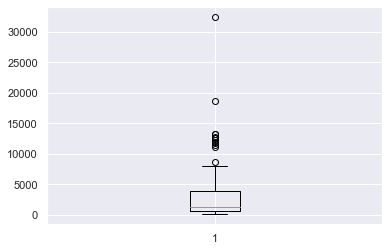

In [92]:
plt.boxplot(LightningPageView_DASHBOARD_PROBLEMATICS.DURATION)
plt.plot()

In [81]:
LightningPageView_DASHBOARD_PROBLEMATICS['EFFECTIVE_PAGE_TIME_DEVIATION_REASON'].value_counts()

PreviousPageNotLoaded                49
PageNotLoaded                        22
InteractionBeforePageLoaded|click     3
PageInBackgroundBeforeLoaded          1
Name: EFFECTIVE_PAGE_TIME_DEVIATION_REASON, dtype: int64

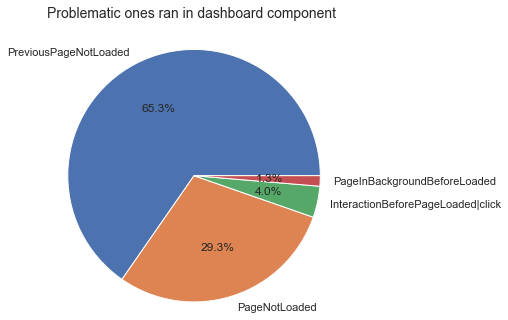

In [82]:
sizes = list(LightningPageView_DASHBOARD_PROBLEMATICS['EFFECTIVE_PAGE_TIME_DEVIATION_REASON'].value_counts())
labels = list(LightningPageView_DASHBOARD_PROBLEMATICS['EFFECTIVE_PAGE_TIME_DEVIATION_REASON'].value_counts().index)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Problematic ones ran in dashboard component \n', fontsize=14)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

## Reports that were not run in Dashboard Components

In [72]:
round(len(LightningPageView_NOT_DASHBOARD) / len(LightningPageView), 3)

0.986

#### 98.6% of the reports caught in sample were not run in a dashboard

In [73]:
LightningPageView_NOT_DASHBOARD.DURATION.mean()

3555.0224163334033

#### The average duration of a page  in this sample is about 3.5 seconds

[]

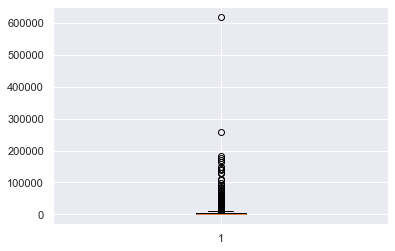

In [109]:
plt.boxplot(LightningPageView_NOT_DASHBOARD.DURATION)
plt.plot()

In [74]:
LightningPageView_NOT_DASHBOARD.EFFECTIVE_PAGE_TIME_DEVIATION.value_counts(True)

False    0.534309
True     0.465691
Name: EFFECTIVE_PAGE_TIME_DEVIATION, dtype: float64

#### About 46% of the pages that not had run in a dashboard had errors whit its loading

In [75]:
LightningPageView_NOT_DASHBOARD_PROBLEMATICS = LightningPageView_NOT_DASHBOARD[LightningPageView_NOT_DASHBOARD.EFFECTIVE_PAGE_TIME_DEVIATION == True]
LightningPageView_NOT_DASHBOARD_PROBLEMATICS.EFFECTIVE_PAGE_TIME_DEVIATION_REASON.value_counts()

PreviousPageNotLoaded                          2258
PageNotLoaded                                   953
InteractionBeforePageLoaded|click               869
PageInBackgroundBeforeLoaded                    270
InteractionBeforePageLoaded|synthetic-hover      56
PageHasError                                     19
Name: EFFECTIVE_PAGE_TIME_DEVIATION_REASON, dtype: int64

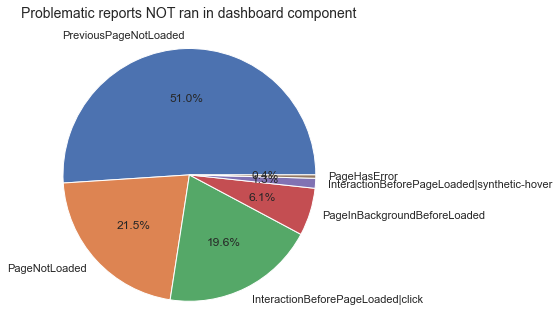

In [76]:
sizes = list(LightningPageView_NOT_DASHBOARD_PROBLEMATICS['EFFECTIVE_PAGE_TIME_DEVIATION_REASON'].value_counts())
labels = list(LightningPageView_NOT_DASHBOARD_PROBLEMATICS['EFFECTIVE_PAGE_TIME_DEVIATION_REASON'].value_counts().index)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Problematic reports NOT ran in dashboard component\n', fontsize=14)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

In [112]:
lpv = pd.read_csv('../datasets/Page_View_by_USER_ID_DERIVED-SESSION_KEY.csv')

In [113]:
lpv.columns

Index(['USER_ID_DERIVED', 'SESSION_KEY', 'EVENT_TYPE', 'TIMESTAMP',
       'REQUEST_ID', 'ORGANIZATION_ID', 'USER_ID', 'CLIENT_ID', 'LOGIN_KEY',
       'USER_TYPE', 'APP_NAME', 'DEVICE_PLATFORM', 'SDK_APP_VERSION',
       'OS_NAME', 'OS_VERSION', 'USER_AGENT', 'BROWSER_NAME',
       'BROWSER_VERSION', 'SDK_VERSION', 'DEVICE_MODEL', 'DEVICE_ID',
       'SDK_APP_TYPE', 'CLIENT_GEO', 'CONNECTION_TYPE', 'UI_EVENT_ID',
       'UI_EVENT_SOURCE', 'UI_EVENT_TIMESTAMP', 'PAGE_START_TIME', 'DURATION',
       'EFFECTIVE_PAGE_TIME_DEVIATION', 'EFFECTIVE_PAGE_TIME_DEVIATION_REASON',
       'EFFECTIVE_PAGE_TIME_DEVIATION_ERROR_TYPE', 'EFFECTIVE_PAGE_TIME',
       'DEVICE_SESSION_ID', 'UI_EVENT_SEQUENCE_NUM', 'PAGE_ENTITY_ID',
       'PAGE_ENTITY_TYPE', 'PAGE_CONTEXT', 'PAGE_URL', 'PAGE_APP_NAME',
       'PREVPAGE_ENTITY_ID', 'PREVPAGE_ENTITY_TYPE', 'PREVPAGE_CONTEXT',
       'PREVPAGE_URL', 'PREVPAGE_APP_NAME', 'TARGET_UI_ELEMENT',
       'PARENT_UI_ELEMENT', 'GRANDPARENT_UI_ELEMENT', 'TIMESTAMP_DER

In [115]:
LightningPageView.columns

Index(['EVENT_TYPE', 'TIMESTAMP', 'REQUEST_ID', 'ORGANIZATION_ID', 'USER_ID',
       'CLIENT_ID', 'SESSION_KEY', 'LOGIN_KEY', 'USER_TYPE', 'APP_NAME',
       'DEVICE_PLATFORM', 'SDK_APP_VERSION', 'OS_NAME', 'OS_VERSION',
       'USER_AGENT', 'BROWSER_NAME', 'BROWSER_VERSION', 'SDK_VERSION',
       'DEVICE_MODEL', 'DEVICE_ID', 'SDK_APP_TYPE', 'CLIENT_GEO',
       'CONNECTION_TYPE', 'UI_EVENT_ID', 'UI_EVENT_SOURCE',
       'UI_EVENT_TIMESTAMP', 'PAGE_START_TIME', 'DURATION',
       'EFFECTIVE_PAGE_TIME_DEVIATION', 'EFFECTIVE_PAGE_TIME_DEVIATION_REASON',
       'EFFECTIVE_PAGE_TIME_DEVIATION_ERROR_TYPE', 'EFFECTIVE_PAGE_TIME',
       'DEVICE_SESSION_ID', 'UI_EVENT_SEQUENCE_NUM', 'PAGE_ENTITY_ID',
       'PAGE_ENTITY_TYPE', 'PAGE_CONTEXT', 'PAGE_URL', 'PAGE_APP_NAME',
       'PREVPAGE_ENTITY_ID', 'PREVPAGE_ENTITY_TYPE', 'PREVPAGE_CONTEXT',
       'PREVPAGE_URL', 'PREVPAGE_APP_NAME', 'TARGET_UI_ELEMENT',
       'PARENT_UI_ELEMENT', 'GRANDPARENT_UI_ELEMENT', 'TIMESTAMP_DERIVED',
       'USER

In [116]:
len(lpv)

9671

In [117]:
len(LightningPageView)

9671

In [122]:
lpv.reset_index().drop("index",axis=1).dropna() == lpv.dropna)

,USER_ID_DERIVED,SESSION_KEY,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,CLIENT_ID,LOGIN_KEY,USER_TYPE,...,PREVPAGE_ENTITY_ID,PREVPAGE_ENTITY_TYPE,PREVPAGE_CONTEXT,PREVPAGE_URL,PREVPAGE_APP_NAME,TARGET_UI_ELEMENT,PARENT_UI_ELEMENT,GRANDPARENT_UI_ELEMENT,TIMESTAMP_DERIVED,CLIENT_IP
0,True,True,True,True,True,True,True,False,True,True,...,False,False,True,True,True,False,False,False,True,True
1,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,False,False,False,True,True
2,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,False,False,False,True,True
3,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,False,False,False,True,True
4,True,True,True,True,True,True,True,False,True,True,...,False,False,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9666,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,False,False,False,True,True
9667,True,True,True,True,True,True,True,False,True,True,...,False,False,True,True,True,False,False,False,True,True
9668,True,True,True,True,True,True,True,False,True,True,...,False,True,True,True,True,False,False,False,True,True
9669,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,False,False,False,True,True
